In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.utils import check_array
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import warnings
import xgboost as xgb
import seaborn as sns
from sklearn import metrics
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# create the final DB
        #drop the Unnamed coloumn
        #drop duplicates rows

In [261]:
dataset = pd.read_csv('DBClassifiedFinal.csv')
dataset = dataset.drop(columns=['Unnamed: 0'])
invalid_idx = []
for ii in range(len(dataset)):
    x = dataset.iloc[ii].cast
    if (len(x) > 100) or x == '[]':
        invalid_idx.append(ii)
        
print("Drop all invalid rows:", len(invalid_idx))

dataset = dataset.drop(invalid_idx)
dataset = dataset.drop_duplicates()

dataset.to_csv('DBClassifiedFinal_Final_After_Cleaning.csv')

Drop all invalid rows: 135


In [254]:
dataset

,title,movie_id,cast,budget,revenue,producers,writers,directors
0,Pirates of the Caribbean: At World's End,285,17.32105912,3.000000,9.610000,10.237959,10.656598,10.656598
1,Spectre,206647,9.566367436666667,2.450000,8.806746,11.085610,10.760058,11.085610
2,The Dark Knight Rises,49026,10.870944316666666,2.500000,10.849391,10.849391,10.849391,10.849391
3,John Carter,49529,3.8206283033333333,2.600000,2.841391,5.447877,7.965731,9.403355
4,Spider-Man 3,559,12.089258133333333,2.580000,8.908716,8.908716,8.908716,8.908716
5,Tangled,38757,6.733775596666667,2.600000,5.917949,6.521054,5.917949,5.917949
6,Avengers: Age of Ultron,99861,15.195579099999998,2.800000,14.054037,15.195579,15.195579,15.195579
7,Harry Potter and the Half-Blood Prince,767,10.126300663333334,2.500000,9.339592,9.481313,9.764755,9.382127
8,Batman v Superman: Dawn of Justice,209112,10.842565826666666,2.500000,8.732602,9.790996,9.790996,8.732602
9,Superman Returns,1452,5.705783973333333,2.700000,3.910812,5.100084,5.439348,7.478628


In [255]:
dataset = pd.read_csv('DBClassifiedFinal_Final_After_Cleaning.csv')
invalid_idx = []
# for ii in range(len(dataset)):
#     x = dataset.iloc[ii].cast
#      #print (type(x))
#      #break
#     if (str(type(x)) == "<class 'numpy.float64'>"):
#         invalid_idx.append(ii)
        
print("Drop all invalid rows:", len(invalid_idx))

Drop all invalid rows: 0


### Spilt the data into train and test set

In [256]:
x = dataset[['cast', 'budget', 'producers', 'writers', 'directors']].values
y = dataset['revenue'].values 
number_of_rows = len(dataset)
rand_gen = np.random.RandomState(0)
shuffled_indices = rand_gen.permutation(np.arange(len(x)))
print(shuffled_indices)
num_train = int(0.80 * number_of_rows)
# x_train = x[shuffled_indices[:num_train]]
# y_train = y[shuffled_indices[:num_train]]
# x_test = x[shuffled_indices[num_train:]]
# y_test = y[shuffled_indices[num_train:]]


[ 383 1448 1271 ... 1653 2607 2732]


In [257]:
# x = dataset[['cast', 'budget', 'producers', 'writers', 'directors']].values
x = dataset[['cast', 'budget', 'producers', 'writers', 'directors']].values
y = dataset['revenue'].values 
# # x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
# # print(x_train)

# normalization

In [259]:
def normalize_mean_std(df, df_train, feature_array):
    for feature_name in feature_array:
        mean_f = float(df_train[feature_name].mean())
        std_f = float(df_train[feature_name].std())
        df.loc[df.index, feature_name] = (df[feature_name] - mean_f) / std_f
    return df  


df = normalize_mean_std(dataset, dataset.iloc[shuffled_indices[:num_train]], ['cast', 'budget','revenue', 'producers', 'writers', 'directors'])

# df = normalize_mean_std(dataset, dataset.iloc[shuffled_indices[:num_train]], ['budget', 'writers', 'director', 'producers', 'actor1', 'actor2', 'actor3'])
df = df.drop(columns=['Unnamed: 0'])
df.to_csv('chental.csv')
df



,title,movie_id,cast,budget,revenue,producers,writers,directors
0,Pirates of the Caribbean: At World's End,285,3.429651,6.661728,5.597967,3.327030,3.731070,3.418613
1,Spectre,206647,1.150199,5.292420,5.082990,3.664657,3.774426,3.585371
2,The Dark Knight Rises,49026,1.533673,5.416903,6.392558,3.570569,3.811862,3.493552
3,John Carter,49529,-0.538732,5.665868,1.258517,1.419093,2.603422,2.931475
4,Spider-Man 3,559,1.891790,5.616075,5.148364,2.797579,2.998594,2.739207
5,Tangled,38757,0.317573,5.665868,3.230942,1.846550,1.745269,1.576689
6,Avengers: Age of Ultron,99861,2.804877,6.163798,8.447102,5.301698,5.633197,5.182926
7,Harry Potter and the Half-Blood Prince,767,1.314789,5.416903,5.424605,3.025650,3.357330,2.923223
8,Batman v Superman: Dawn of Justice,209112,1.525331,5.416903,5.035455,3.149000,3.368326,2.670751
9,Superman Returns,1452,0.015400,5.914833,1.944138,1.280564,1.544704,2.183328


float64


<IPython.core.display.Javascript object>


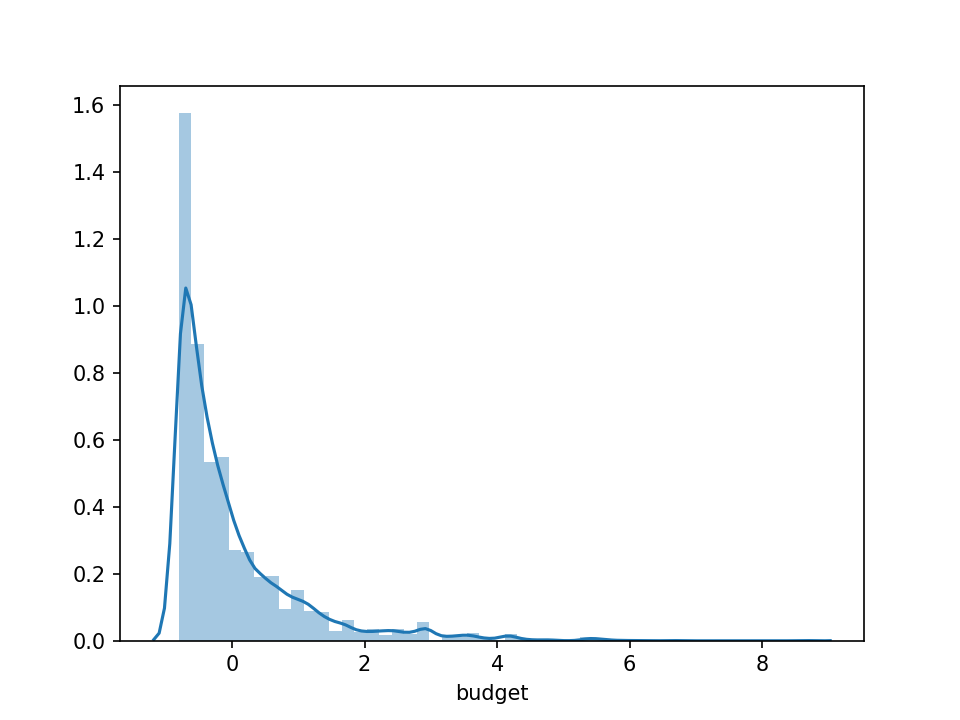

C:\Users\Chen Havakuk 1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [222]:
col = 'budget'
print(df[col].dtypes)
nan_idx_train = df[col].isnull()
sns.distplot(df[col][~nan_idx_train])

In [223]:
# col = 'cast'
# print(df[col].dtypes)
# nan_idx_train = df[col].isnull()
# sns.distplot(df[col][~nan_idx_train])

In [224]:
# col = 'producers'
# print(df[col].dtypes)
# nan_idx_train = df[col].isnull()
# sns.distplot(df[col][~nan_idx_train])

# Spilt the data into train and test set again, after normalization

In [235]:
# x = df[['cast', 'budget', 'producers', 'writers', 'directors']].values
x = df[['budget', 'writers', 'director', 'producers', 'actor1', 'actor2', 'actor3']].values
y = df['revenue'].values 

rand_gen = np.random.RandomState(0)
shuffled_indices = rand_gen.permutation(np.arange(len(x)))
print(shuffled_indices)
num_train = int(0.8 * number_of_rows)

x_train = x[shuffled_indices[:num_train]]
y_train = y[shuffled_indices[:num_train]]
x_test = x[shuffled_indices[num_train:]]
y_test = y[shuffled_indices[num_train:]]

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
# print(x_train)


[ 383 1448 1271 ... 1653 2607 2732]
[1.68226409 1.15701506 0.46309502 1.24277075 1.18758029 0.69622704
 0.37215114]
<class 'numpy.ndarray'>
[1 2 3 4]


# remove outliers

In [200]:
# def remove_outliers(df, df_train, feature_name):
#     invalid_idx = []
#     counter = 0
#     #for feature_name in feature_array:
#     mean_f = float(df_train[feature_name].mean())
#     std_f = float(df_train[feature_name].std())
#     print(mean_f)
#     print(std_f)
#     max_err = mean_f + 3 * (std_f)
#     min_err = mean_f - 3 * (std_f)
#     for element in df[feature_name]:
#         counter+=1
#         if element > max_err or element < min_err:
#             invalid_idx.append(counter)
            
#     print(len(invalid_idx))
# #     dataset = dataset.drop(invalid_idx)
#     return df


# # def normalize_mean_std(df, df_train, feature_array):
# #     for feature_name in feature_array:
# #         mean_f = float(df_train[feature_name].mean())
# #         std_f = float(df_train[feature_name].std())
# #         df.loc[df.index, feature_name] = (df[feature_name] - mean_f) / std_f
# #     return df  

# # df = normalize_mean_std(dataset, dataset.iloc[shuffled_indices[:num_train]], ['cast', 'budget','revenue', 'producers', 'writers', 'directors'])
# # df = df.drop(columns=['Unnamed: 0'])
# # df.to_csv('chental.csv')
# # df

In [201]:
# remove_outliers(df,df.iloc[shuffled_indices[:num_train]],['writers'])
# df

## Model

In [202]:
KNN_model = KNeighborsRegressor()
KNN_model.fit(x_train, y_train)
y_pred_KNN = KNN_model.predict(x_test)

In [203]:
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

In [204]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

In [205]:
Linear_model = LinearRegression()
Linear_model.fit(x_train, y_train)
y_pred_Linear = Linear_model.predict(x_test)

In [206]:
xg_model = xgb.XGBRegressor()
xg_model.fit(x_train, y_train)
y_pred_xg = dt_model.predict(x_test)



In [207]:
# SGD_model = SGDRegressor()
# SGD_model.fit(x_train, y_train)
# y_pred_SGD = SGD_model.predict(x_test)

In [208]:
# Logistic_model = LogisticRegression()
# Logistic_model.fit(x_train, y_train)
# y_pred_Logistic = Logistic_model.predict(x_test)

In [209]:
#calculate the percentage error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [210]:
# #calculate the new error
# def mean_absolute_percentage_error(y_true, y_pred): 
#     y_true, y_pred = np.array(y_true), np.array(y_pred)
#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [211]:
tal = [1, 0.5, -6, 7]
chen = [1.25, 0.6, -5, 7]
# 1- 0.25, 2-0.2, 3- 0.166 4-0 = 0.154
print(mean_absolute_percentage_error(tal, chen)) 

15.416666666666664


In [212]:
print('MSE RandomForestRegressor:', metrics.mean_squared_error(y_test, y_pred_rf))
print('MAPE RandomForestRegressor:', mean_absolute_percentage_error(y_test, y_pred_rf))
print ("-------------------------------------------------------------------------------")

print('MSE DecisionTreeRegressor:', metrics.mean_squared_error(y_test, y_pred_dt))
print('MAPE DecisionTreeRegressor:', mean_absolute_percentage_error(y_test, y_pred_dt))
print ("-------------------------------------------------------------------------------")

print('MSE KNeighborsRegressor:', metrics.mean_squared_error(y_test, y_pred_KNN))
print('MAPE KNeighborsRegressor:', mean_absolute_percentage_error(y_test, y_pred_KNN))
print ("-------------------------------------------------------------------------------")

print('MSE LinearRegression:', metrics.mean_squared_error(y_test, y_pred_Linear))
print('MAPE LinearRegression:', mean_absolute_percentage_error(y_test, y_pred_Linear))
print ("-------------------------------------------------------------------------------")

print('MAE LinearRegression:', metrics.mean_absolute_error(y_test, y_pred_Linear))
print('MAPE LinearRegression:', mean_absolute_percentage_error(y_test, y_pred_Linear))
print ("-------------------------------------------------------------------------------")

print('MSE xgboost:', metrics.mean_squared_error(y_test, y_pred_xg))
# print('MAPE xgboost:', mean_absolute_percentage_error(y_test, y_pred_xg))
print ("-------------------------------------------------------------------------------")




#print('MSE LogisticRegression:', metrics.mean_squared_error(y_test, y_pred_Logistic))
#print('MSE XGBRegressor:', metrics.mean_squared_error(y_test, y_pred_xg))
#print('MSE SGDRegressor:', metrics.mean_squared_error(y_test, y_pred_xg))
df = pd.DataFrame({'Actual':y_test, 'Predicted_RF':y_pred_rf, 'Predicted_DT':y_pred_dt, 'Predicted_KNN': y_pred_KNN, 'Predicted_Linear': y_pred_Linear, 'Predicted_Linear': y_pred_Linear})#,'Predicted_XGB': y_pred_xg, 'Predicted_SGD': y_pred_SGD})
df
df.to_csv('results.csv')

MSE RandomForestRegressor: 0.5038825031006122
MAPE RandomForestRegressor: 412.7542744436345
-------------------------------------------------------------------------------
MSE DecisionTreeRegressor: 0.756397368623339
MAPE DecisionTreeRegressor: 682.1685057935659
-------------------------------------------------------------------------------
MSE KNeighborsRegressor: 0.598944073268775
MAPE KNeighborsRegressor: 1315.8534082569067
-------------------------------------------------------------------------------
MSE LinearRegression: 0.6076778697433336
MAPE LinearRegression: 17963.711809131575
-------------------------------------------------------------------------------
MAE LinearRegression: 0.4652418266957707
MAPE LinearRegression: 17963.711809131575
-------------------------------------------------------------------------------
MSE xgboost: 0.756397368623339
-------------------------------------------------------------------------------


In [139]:
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [140]:
# plt.figure(figsize=(5, 7))

# ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
# sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)

# plt.title('Actual vs Fitted Values for Price')

# plt.show()
# plt.close()

# grid

# KNN model

In [ ]:
params = {
    'n_neighbors' : [5, 10, 15, 20, 25, 30],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10,20,30,40,50],
     'p': [1,2]
}
grid_kn = GridSearchCV(estimator = KNN_model,
                        param_grid = params,
                        scoring = 'neg_mean_squared_error', 
                        cv = 3, 
                        verbose = 1,
                        n_jobs = -1)
grid_kn.fit(x_train, y_train)
print(grid_kn.best_estimator_)
print(grid_kn.score(x_test, y_test))

# rf model

In [ ]:
params = {
    'n_estimators' : [100, 200, 300, 400, 500],
    'criterion': ['mse', 'mae'],
    #'max_depth': ['none'],
    'min_samples_split': [2,5,8,10,15],
    'max_features': ['auto','sqrt','log2']
}
grid_rf = GridSearchCV(estimator = rf_model,
                        param_grid = params,
                        scoring = 'neg_mean_squared_error', 
                        cv = 3, 
                        verbose = 1,
                        n_jobs = -1)
grid_rf.fit(x_train, y_train)
print(grid_rf.best_estimator_)
print(grid_rf.score(x_test, y_test))

# dt_model

In [ ]:
params = {
    'criterion': ['mse', 'mae','friedman_mse'],
    'splitter': ['best','random'],
    'min_samples_split': [2,5,8,10,15],
    'max_features': ['auto','sqrt','log2']
}
grid_dt = GridSearchCV(estimator = dt_model,
                        param_grid = params,
                        scoring = 'neg_mean_squared_error', 
                        cv = 3, 
                        verbose = 1,
                        n_jobs = -1)
grid_dt.fit(x_train, y_train)
print(grid_dt.best_estimator_)
print(grid_dt.score(x_test, y_test))

# Linear_model 


In [ ]:
params = {
    'fit_intercept' : ['true', 'false'],
    #'normalizebool': ['true', 'false'],
    'copy_X': ['true', 'false']  
}
grid_lr = GridSearchCV(estimator = Linear_model,
                        param_grid = params,
                        scoring = 'neg_mean_squared_error', 
                        cv = 3, 
                        verbose = 1,
                        n_jobs = -1)
grid_lr.fit(x_train, y_train)
print(grid_lr.best_estimator_)
print(grid_lr.score(x_test, y_test))

# Algorithem Part two